* 写在开始的后记
    * 相对于clerk-v2的改进：
        * 学会了sklearn的一些套路，pd_get_dummies相当好用，而且也不用转移到RMD去撸模型了。
        * 理解场景。一类模型用来play with 2013-2016 data,一类模型用来预测2017（因为两种data可获取的feature很不一样）
        * 有吸收start with baby step思想，有若干版本模型，逐步改进。
        * 重心放在feature engineering，而非算法选择，因为这样更重要。
    * 仍存在的不足
        * 仍有强迫症想清洗一堆feature放到模型里的想法，事实上如果有domain knowledge， 完全可以先按经验选择最重要的feature去跑第一个模型，然后做error analysis，然后在思考要加什么feature。  
        甚至就算没有domain knowledge，这一步也可以做到：模型1剔除几个分数变量后的结果还不如baseline model，这能够说明模型1里的feature都是无关紧要的，被剔除那几个才是关键。

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#load-and-merge-data" data-toc-modified-id="load-and-merge-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>load and merge data</a></div><div class="lev2 toc-item"><a href="#target-set:-puer2017" data-toc-modified-id="target-set:-puer2017-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>target set: puer2017</a></div><div class="lev2 toc-item"><a href="#data-from-2013-2016" data-toc-modified-id="data-from-2013-2016-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>data from 2013-2016</a></div><div class="lev2 toc-item"><a href="#codebook" data-toc-modified-id="codebook-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>codebook</a></div><div class="lev1 toc-item"><a href="#clean-data" data-toc-modified-id="clean-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>clean data</a></div><div class="lev2 toc-item"><a href="#clean考生信息" data-toc-modified-id="clean考生信息-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>clean考生信息</a></div><div class="lev2 toc-item"><a href="#clean-单位信息" data-toc-modified-id="clean-单位信息-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>clean 单位信息</a></div><div class="lev2 toc-item"><a href="#clean岗位信息" data-toc-modified-id="clean岗位信息-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>clean岗位信息</a></div><div class="lev2 toc-item"><a href="#clean报考要求" data-toc-modified-id="clean报考要求-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>clean报考要求</a></div><div class="lev2 toc-item"><a href="#clean录取情况，年份" data-toc-modified-id="clean录取情况，年份-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>clean录取情况，年份</a></div><div class="lev1 toc-item"><a href="#modeling" data-toc-modified-id="modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>modeling</a></div><div class="lev2 toc-item"><a href="#1st-model" data-toc-modified-id="1st-model-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>1st model</a></div><div class="lev2 toc-item"><a href="#2nd-model-with-MinMaxScaler-on-'exam',-'seat',-'rk'" data-toc-modified-id="2nd-model-with-MinMaxScaler-on-'exam',-'seat',-'rk'-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>2nd model with MinMaxScaler on 'exam', 'seat', 'rk'</a></div><div class="lev2 toc-item"><a href="#3rd-model" data-toc-modified-id="3rd-model-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>3rd model</a></div><div class="lev3 toc-item"><a href="#add--'norm_exam'" data-toc-modified-id="add--'norm_exam'-331"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>add  'norm_exam'</a></div><div class="lev3 toc-item"><a href="#measure-margin-advantage-within-candidates-of-the-same-job" data-toc-modified-id="measure-margin-advantage-within-candidates-of-the-same-job-332"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>measure margin advantage within candidates of the same job</a></div><div class="lev4 toc-item"><a href="#understanding-'rk'-feature-in-df" data-toc-modified-id="understanding-'rk'-feature-in-df-3321"><span class="toc-item-num">3.3.2.1&nbsp;&nbsp;</span>understanding 'rk' feature in df</a></div><div class="lev3 toc-item"><a href="#drop-'rk',-add'exam_rk',-'margin_adv'" data-toc-modified-id="drop-'rk',-add'exam_rk',-'margin_adv'-333"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>drop 'rk', add'exam_rk', 'margin_adv'</a></div><div class="lev2 toc-item"><a href="#4th-model" data-toc-modified-id="4th-model-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>4th model</a></div><div class="lev2 toc-item"><a href="#tuning-4th-model" data-toc-modified-id="tuning-4th-model-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>tuning 4th model</a></div><div class="lev2 toc-item"><a href="#5th-model:-to-predict-on-2017-data" data-toc-modified-id="5th-model:-to-predict-on-2017-data-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>5th model: to predict on 2017 data</a></div><div class="lev1 toc-item"><a href="#end" data-toc-modified-id="end-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>end</a></div>

In [175]:
ls

2013.xls            2017_interview.xls  jobs2014.xls        jobs2017.xlsx
2014.xls            2017_non_phy.xlsx   jobs2015.xls
2015.xls            2017_phy.xlsx       jobs2016.xls
2016.xls            jobs2013.xls        jobs2017.xls


In [176]:
cd data

[Errno 2] No such file or directory: 'data'
/Users/EzraYang/Desktop/projects_fun/govenment_clerk/data


In [177]:
ls

2013.xls            2017_interview.xls  jobs2014.xls        jobs2017.xlsx
2014.xls            2017_non_phy.xlsx   jobs2015.xls
2015.xls            2017_phy.xlsx       jobs2016.xls
2016.xls            jobs2013.xls        jobs2017.xls


In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import re  

pd.set_option('display.max_rows', 200)

# load and merge data

## target set: puer2017

In [524]:
p17 = pd.ExcelFile('2017_interview.xls').parse(0)
p17.info()
    # 这个名单不包括法检系统

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 8 columns):
2017年普洱市考试录用公务员进入面试人员名单          519 non-null object
Unnamed: 1                       518 non-null object
Unnamed: 2                       518 non-null object
Unnamed: 3                       518 non-null object
Unnamed: 4                       518 non-null object
Unnamed: 5                       518 non-null object
Unnamed: 6                       1 non-null object
     选中A列→CTRL+F→输入准考证号→查找下一个    1 non-null object
dtypes: object(8)
memory usage: 32.5+ KB


In [525]:
p17.head()

,2017年普洱市考试录用公务员进入面试人员名单,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,选中A列→CTRL+F→输入准考证号→查找下一个
0,特别提示：请进入面试的考生认真仔细从表中查找自己的信息，按规定的时间地点参加面试。,NaN,NaN,NaN,NaN,NaN,NaN,CTRL+A→CTRL+F→输入准考证号→查找下一个
1,准考证号,岗位代码,面试时间,抽签开始时间,面试开始时间,面试地点,备注,NaN
2,501270602008,50827002061,2017年7月29日上午,当天7:00在候考室准时开始抽签,当天8:00正式开始面试,中共普洱市委党校,NaN,NaN
3,501270602326,50827002061,2017年7月29日上午,当天7:00在候考室准时开始抽签,当天8:00正式开始面试,中共普洱市委党校,NaN,NaN
4,501270601714,50827002061,2017年7月29日上午,当天7:00在候考室准时开始抽签,当天8:00正式开始面试,中共普洱市委党校,NaN,NaN


In [526]:
def pull_up_rows(df, numRow):
    df.columns = df.iloc[numRow - 1, :]
    df = df[numRow:]
    return df

In [527]:
p17 = pull_up_rows(p17, 2)

In [528]:
job2017 = pd.ExcelFile('jobs2017.xlsx').parse(0)

In [529]:
job2017 = job2017.drop([2689])

job2017.loc[:,'岗位代码'] = job2017['岗位代码'].astype(int)
job2017.loc[:,'岗位代码'] = job2017['岗位代码'].astype(str)

In [530]:
temp = pd.merge(p17, job2017, 
                on='岗位代码', how='inner')
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 41 columns):
准考证号                         349 non-null object
岗位代码                         349 non-null object
面试时间                         349 non-null object
抽签开始时间                       349 non-null object
面试开始时间                       349 non-null object
面试地点                         349 non-null object
备注                           0 non-null object
nan                          0 non-null object
招录单位全称                       349 non-null object
单位类别                         349 non-null object
属地信息一级                       349 non-null object
属地信息二级                       349 non-null object
招录岗位名称                       349 non-null object
岗位类型                         349 non-null object
是否为法官检察官助理岗位                 349 non-null object
公安机关人民警察岗位类别                 349 non-null object
岗位工作简介                       349 non-null object
招录人数                         349 non-null int64
报考人员身份要求          

In [531]:
p17_nonphy = pd.ExcelFile('2017_non_phy.xlsx').parse(0)
p17_phy = pd.ExcelFile('2017_phy.xlsx').parse(0)

In [532]:
p17_nonphy.loc[:,'准考证号'] = p17_nonphy['准考证号'].astype(str)
p17_nonphy.loc[:,'岗位代码'] = p17_nonphy['岗位代码'].astype(str)

p17_phy.loc[:,'准考证号'] = p17_phy['准考证号'].astype(str)
p17_phy.loc[:,'岗位代码'] = p17_phy['岗位代码'].astype(str)

temp.loc[:,'准考证号'] = temp['准考证号'].astype(str)
temp.loc[:,'岗位代码'] = temp['岗位代码'].astype(str)

In [533]:
p17_allphy = pd.concat([p17_phy, p17_nonphy])

In [534]:
puer17 = pd.merge(temp, p17_allphy, 
                 on=['准考证号','岗位代码'], how='left')
puer17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 47 columns):
准考证号                         349 non-null object
岗位代码                         349 non-null object
面试时间                         349 non-null object
抽签开始时间                       349 non-null object
面试开始时间                       349 non-null object
面试地点                         349 non-null object
备注                           0 non-null object
nan                          0 non-null object
招录单位全称                       349 non-null object
单位类别                         349 non-null object
属地信息一级                       349 non-null object
属地信息二级                       349 non-null object
招录岗位名称                       349 non-null object
岗位类型                         349 non-null object
是否为法官检察官助理岗位                 349 non-null object
公安机关人民警察岗位类别                 349 non-null object
岗位工作简介                       349 non-null object
招录人数                         349 non-null int64
报考人员身份要求          

In [535]:
puer17 = puer17.dropna(how='all', axis=1)
puer17 = puer17.dropna(how='any', axis=0)
puer17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 348
Data columns (total 45 columns):
准考证号                         334 non-null object
岗位代码                         334 non-null object
面试时间                         334 non-null object
抽签开始时间                       334 non-null object
面试开始时间                       334 non-null object
面试地点                         334 non-null object
招录单位全称                       334 non-null object
单位类别                         334 non-null object
属地信息一级                       334 non-null object
属地信息二级                       334 non-null object
招录岗位名称                       334 non-null object
岗位类型                         334 non-null object
是否为法官检察官助理岗位                 334 non-null object
公安机关人民警察岗位类别                 334 non-null object
岗位工作简介                       334 non-null object
招录人数                         334 non-null int64
报考人员身份要求                     334 non-null object
性别要求                         334 non-null object
民族要求          

## data from 2013-2016

In [191]:
p = {}

for file in ['2013.xls','2014.xls','2015.xls','2016.xls']:
    df = pd.ExcelFile(file).parse(0)
    p[file.replace('.xls', '')] = df
    
p.keys()

dict_keys(['2015', '2013', '2016', '2014'])

In [192]:
j = {}
for file in ['jobs2013.xls', 'jobs2014.xls', 'jobs2015.xls', 'jobs2016.xls']:
    df = pd.ExcelFile(file).parse(0)
    j[file.replace('.xls', '').replace('jobs', '')] = df
    
j.keys()

dict_keys(['2015', '2013', '2016', '2014'])

In [193]:
for year in ['2013', '2014']:
    p[year] = pull_up_rows(p[year], 3)
for year in ['2015', '2016']:
    p[year] = pull_up_rows(p[year], 2)

In [194]:
for key in p.keys():
    print(key + ': ')
    print(p[key].info())

2015: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 2 to 643
Data columns (total 24 columns):
分组                    642 non-null object
组合                    642 non-null object
准考证号                  642 non-null object
姓名                    642 non-null object
性别                    642 non-null object
民族                    642 non-null object
毕业院校                  581 non-null object
学历                    581 non-null object
学位                    581 non-null object
岗位代码                  642 non-null object
招录单位全称                642 non-null object
招考人数                  642 non-null object
笔试
成绩                 642 non-null object
面试       成绩           642 non-null object
其他         测试         22 non-null object
综合     成绩             642 non-null object
招考   岗位         排名    642 non-null object
是否进入体检体测              642 non-null object
是否进入考察                642 non-null object
最终是否录用                642 non-null object
抽签考场号码                642 non-null object
抽签轮次号码 

In [195]:
for key in p.keys():
    for col in ['准考证号','岗位代码']:
        p[key].loc[:,col] = p[key][col].astype(str)

In [196]:
for key in j.keys():
    print(key+':')
    print(j[key].info())

2015:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5005 entries, 0 to 5004
Data columns (total 35 columns):
属地信息第一列             5005 non-null object
属地信息第二列             5005 non-null object
岗位代码                5005 non-null int64
招录单位全称              5005 non-null object
单位类别                5005 non-null object
招录主管部门              5005 non-null object
单位级别                5005 non-null object
招录岗位名称              5005 non-null object
岗位工作简介              4995 non-null object
招录人数                5005 non-null int64
报考人员身份要求            5005 non-null object
性别要求                5005 non-null object
民族要求                5005 non-null object
岗位具体需要的少数民族名称       5005 non-null object
学历性质要求              5005 non-null object
学历要求                5005 non-null object
学位要求                5005 non-null object
年龄要求                5005 non-null object
第一组专业要求一级目录         5005 non-null object
第一组专业要求二级目录         5005 non-null object
第一组专业要求具体专业         5005 non-null object
第二组专业要求一级目录         5005 non

In [197]:
j['2013'] = j['2013'].loc[1:,:]

In [198]:
for key in j.keys():
    j[key].loc[:,'岗位代码'] = j[key]['岗位代码'].astype(int)
    j[key].loc[:,'岗位代码'] = j[key]['岗位代码'].astype(str)

In [199]:
for key in p.keys():
    print(key + ':')
    print(p[key]['岗位代码'].apply(len).value_counts())

2015:
10    642
Name: 岗位代码, dtype: int64
2013:
10    483
Name: 岗位代码, dtype: int64
2016:
11    230
12     29
Name: 岗位代码, dtype: int64
2014:
10    921
Name: 岗位代码, dtype: int64


In [200]:
for key in j.keys():
    print(key + ':')
    print(j[key]['岗位代码'].apply(len).value_counts())  # need to add padding zeros

2015:
9     2441
10    2102
6      359
5       56
4       47
Name: 岗位代码, dtype: int64
2013:
9     3876
10    3593
6      591
5      124
4       64
Name: 岗位代码, dtype: int64
2016:
11    4020
Name: 岗位代码, dtype: int64
2014:
10    3735
9     3577
6      435
5      112
4       69
Name: 岗位代码, dtype: int64


In [201]:
for key in ['2013','2014','2015']:
    j[key].loc[:, '岗位代码'] = j[key]['岗位代码'].apply('{0:0>10}'.format)

In [202]:
puer = {}

for key in p.keys():
    puer[key] = pd.merge(p[key], j[key],
                         on='岗位代码', how='left')

In [203]:
for key in puer.keys():
    print(key + ':')
    print(puer[key].info())

2015:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 642 entries, 0 to 641
Data columns (total 58 columns):
分组                    642 non-null object
组合                    642 non-null object
准考证号                  642 non-null object
姓名                    642 non-null object
性别                    642 non-null object
民族                    642 non-null object
毕业院校                  581 non-null object
学历                    581 non-null object
学位                    581 non-null object
岗位代码                  642 non-null object
招录单位全称_x              642 non-null object
招考人数                  642 non-null object
笔试
成绩                 642 non-null object
面试       成绩           642 non-null object
其他         测试         22 non-null object
综合     成绩             642 non-null object
招考   岗位         排名    642 non-null object
是否进入体检体测              642 non-null object
是否进入考察                642 non-null object
最终是否录用                642 non-null object
抽签考场号码                642 non-null object
抽签轮次号码  

In [204]:
for key in puer.keys():
    puer[key] = puer[key][pd.notnull(puer[key]['单位类别'])].copy()
    print(key+': ')
    print(puer[key].shape)
    print(puer[key].columns)

2015: 
(581, 58)
Index(['分组', '组合 ', '准考证号', '姓名', '性别', '民族', '毕业院校', '学历', '学位', '岗位代码',
       '招录单位全称_x', '招考人数', '笔试\n成绩', '面试       成绩', '其他         测试',
       '综合     成绩', '招考   岗位         排名', '是否进入体检体测', '是否进入考察', '最终是否录用',
       '抽签考场号码', '抽签轮次号码', '抽签  胸牌  号码', '考生具体         面试时间', '属地信息第一列',
       '属地信息第二列', '招录单位全称_y', '单位类别', '招录主管部门', '单位级别', '招录岗位名称', '岗位工作简介',
       '招录人数', '报考人员身份要求', '性别要求', '民族要求', '岗位具体需要的少数民族名称', '学历性质要求', '学历要求',
       '学位要求', '年龄要求', '第一组专业要求一级目录', '第一组专业要求二级目录', '第一组专业要求具体专业',
       '第二组专业要求一级目录', '第二组专业要求二级目录', '第三组专业要求一级目录', '第三组专业要求二级目录', '生源地或户籍要求',
       '服务地要求', '政治面貌要求', '国家司法考试证书要求', '是否为法检系统司法岗位', '是否为人民警察岗位',
       '是否需测试少数民族语言', '其他招录条件', '有关说明', '是否为不受开考比例限制的特殊岗位'],
      dtype='object')
2013: 
(483, 54)
Index(['准考证号', '姓名', '性别', '民族', '毕业院校', '学历', '学位', '岗位代码', '招考单位', '招考人数',
       '笔试        成绩', '面试       成绩', '综合     成绩', '岗位         排名',
       '是否进入体检（体测）', '是否体检（体测）合格', '是否进入考察', '是否考察合格', '是否录用', '面试     考场',
   

In [205]:
pcon = {} # con for condense

pcon['13'] = puer['2013'][['准考证号', '姓名', '性别', '民族', '毕业院校', '学历', '学位', 
                            '笔试        成绩', '面试       成绩', '综合     成绩', '岗位         排名',
                            '招录单位全称','单位类别', '单位级别', '招录单位属地', 
                            '岗位代码', '招录岗位名称','是否为人民警察岗位', '招考人数',  
                            '报考人员身份要求', '性别要求', '民族要求', '学历性质要求', '学历要求','学位要求', 
                            '年龄要求',  '生源地或户籍要求', '服务地要求', '政治面貌要求',
                            '其他招录条件', '有关说明',
                            '是否录用', ]].copy()   # (缺属地信息第二级)

pcon['14'] = puer['2014'][['准考证号', '姓名', '性别', '民族', '毕业院校', '学历', '学位',                           # 考生信息
                            '笔试\n成绩', '面试       成绩', '综合     成绩', '岗位         排名',                  # 考生信息2
                            '招录单位全称_y', '单位类别',  '单位级别','属地信息第一列', '属地信息第二列',               # 单位信息
                            '岗位代码', '招录岗位名称',  '是否为人民警察岗位', '招录人数',                     # 岗位信息
                            '报考人员身份要求', '性别要求', '民族要求', '学历性质要求', '学历要求', '学位要求',      # 报考要求1
                            '年龄要求', '生源地或户籍要求', '服务地要求','政治面貌要求',                           # 报考要求2
                            '其他招录条件', '有关说明',                                                           # 其它招录条件
                            '是否录用',   ]].copy()

pcon['15'] = puer['2015'][['准考证号', '姓名', '性别', '民族', '毕业院校', '学历', '学位', 
                            '笔试\n成绩', '面试       成绩',  '综合     成绩', '招考   岗位         排名', 
                            '招录单位全称_y','单位类别', '单位级别', '属地信息第一列','属地信息第二列', 
                            '岗位代码','招录岗位名称','是否为人民警察岗位', '招考人数', 
                            '报考人员身份要求', '性别要求', '民族要求', '学历性质要求', '学历要求', '学位要求', 
                            '年龄要求', '生源地或户籍要求', '服务地要求', '政治面貌要求', 
                            '其他招录条件', '有关说明', 
                            '最终是否录用',]].copy()

pcon['16'] = puer['2016'][['准考证号', '姓名', '性别', '民族', '毕业院校', '学历', '学位', 
                             '笔试\n总成绩', '面试       成绩',  '综合     成绩','岗位         排名',
                            '招录单位全称_y', '单位类别', '单位级别', '属地信息一级', '属地信息二级',
                            '岗位代码', '招录岗位名称', '岗位类型',  '招考人数', 
                            '报考人员身份要求', '性别要求', '民族要求', '学历性质要求', '学历要求', '学位要求', 
                            '年龄要求', '生源或户籍要求', '服务地要求（定向服务基层“四个项目”人员岗位填写）','政治面貌要求', 
                            '其他招录条件', '有关说明', 
                            '最终是否录用', ]].copy()

In [206]:
def recode_county(name):
    return name.replace('宁洱哈尼族彝族自治县',
                        '宁洱县').replace('墨江哈尼族自治县', 
                        '墨江县').replace('景东彝族自治县',
                        '景东县').replace('景谷傣族彝族自治县',
                        '景谷县').replace('镇沅彝族哈尼族拉祜族自治县', 
                        '镇沅县').replace('江城哈尼族彝族自治县',
                        '江城县').replace('孟连傣族拉祜族佤族自治县',
                        '孟连县').replace('澜沧拉祜族自治县',
                        '澜沧县').replace('西盟佤族自治县',  
                        '西盟县')

In [207]:
pcon['13'].loc[:,'招录单位全称'] = pcon['13']['招录单位全称'].apply(recode_county)

In [208]:
def secondary_loc(string):
    if '县' in string:
        county = re.search('..县', string).group(0)
    elif '区' in string:
        county = re.search('..区', string).group(0)
    else: return np.nan
    return county

In [209]:
pcon['13']['属地信息第二列'] = pcon['13']['招录单位全称'].apply(secondary_loc)

pcon['13']['属地信息第二列'].value_counts()

景东县    67
景谷县    64
宁洱县    51
墨江县    51
江城县    48
镇沅县    42
西盟县    41
澜沧县    39
孟连县    37
思茅区    30
自治县     1
Name: 属地信息第二列, dtype: int64

In [210]:
pcon['13'].loc[pcon['13']['属地信息第二列'] == '自治县', ['招录单位全称','属地信息第二列' ]] = ['中共西盟县委组织部','西盟县']

In [211]:
pcon['13'].loc[pcon['13']['单位级别'] == '州市级单位','属地信息第二列'] = '市级'

In [212]:
pcon['13'] = pcon['13'][['准考证号', '姓名', '性别', '民族', '毕业院校', '学历', '学位', 
                            '笔试        成绩', '面试       成绩', '综合     成绩', '岗位         排名',
                            '招录单位全称','单位类别', '单位级别', '招录单位属地','属地信息第二列', 
                            '岗位代码', '招录岗位名称','是否为人民警察岗位', '招考人数',  
                            '报考人员身份要求', '性别要求', '民族要求', '学历性质要求', '学历要求','学位要求', 
                            '年龄要求',  '生源地或户籍要求', '服务地要求', '政治面貌要求',
                            '其他招录条件', '有关说明',
                            '是否录用']]

In [213]:
for key in pcon.keys():
    print(key)
    print(pcon[key].shape)

15
(581, 33)
13
(483, 33)
16
(230, 33)
14
(876, 33)


## codebook

In [214]:
cols = ['tkt', 'name','gend','ethnic','school','edu','dgr',
        'exam','intv','scr','rk',
        'og','og_cls','og_rk','loc_prm','loc_sec',
        'jc','jn','pl','seat',
        'rq_id','rq_gd','rq_eth','rq_edcls','rq_edu','rq_dgr',
        'rq_ag','rq_sc','rq_sv','rq_pol',
        'rq_other','stmt','accp']
len(cols)

33

* 考生信息
    * 'tkt':  准考证号
    * 'name': 姓名
    * 'gend': 性别
    * 'ethnic': 民族
    * 'school': 毕业院校
    * 'edu':  学历
    * 'dgr':  学位
    * 'exam': 笔试
    * 'intv': 面试
    * 'scr':  总分
    * 'rk':   岗位排名  
    .  

* 单位信息
    * 'og':   招录单位名称
    * 'og_cls':  单位性质
    * 'og_rk':   单位级别
    * 'loc_prm': 一级属地信息
    * 'loc_sec': 二级属地信息  
    .  
* 岗位信息
    * 'jc':  岗位代码
    * 'jn':  岗位名称
    * 'pl':  是否警察
    * 'seat':招考人数   
    .  
* 报考要求
    * 'rq_id':   要求-身份
    * 'rq_gd':   要求-性别
    * 'rq_eth':  要求-民族
    * 'rq_edcls':要求-学历性质
    * 'rq_edu':  要求-学历
    * 'rq_dgr':  要求-学位
    * 'rq_ag':   要求-年龄
    * 'rq_sc':   要求-生源/户籍地
    * 'rq_sv':   要求-服务地
    * 'rq_pol':  要求-政治面貌
    * 'rq_other':要求-其它
    * 'stmt':  说明
    
* 'accp'

In [215]:
for key in pcon.keys():
    pcon[key].columns = cols

In [216]:
for key in pcon.keys():
    print(key)
    print(pcon[key].info())

15
<class 'pandas.core.frame.DataFrame'>
Int64Index: 581 entries, 0 to 641
Data columns (total 33 columns):
tkt         581 non-null object
name        581 non-null object
gend        581 non-null object
ethnic      581 non-null object
school      581 non-null object
edu         581 non-null object
dgr         581 non-null object
exam        581 non-null object
intv        581 non-null object
scr         581 non-null object
rk          581 non-null object
og          581 non-null object
og_cls      581 non-null object
og_rk       581 non-null object
loc_prm     581 non-null object
loc_sec     581 non-null object
jc          581 non-null object
jn          581 non-null object
pl          581 non-null object
seat        581 non-null object
rq_id       581 non-null object
rq_gd       581 non-null object
rq_eth      581 non-null object
rq_edcls    581 non-null object
rq_edu      581 non-null object
rq_dgr      581 non-null object
rq_ag       581 non-null object
rq_sc       581 non-null obj

In [217]:
pcon['13'].loc[pd.isnull(pcon['13']['loc_sec']),['og','og_cls','og_rk','loc_prm','loc_sec',] ]

,og,og_cls,og_rk,loc_prm,loc_sec
338,孟连富岩乡人民政府,行政机关,乡镇级单位,普洱市,NaN


In [218]:
pcon['13'].loc[pd.isnull(pcon['13']['loc_sec']),['og','loc_sec',]] = ['孟连县富岩乡人民政府',
                                                                      '孟连县']

In [219]:
pcon['13']['yr'] = '2013'
pcon['14']['yr'] = '2014'
pcon['15']['yr'] = '2015'
pcon['16']['yr'] = '2016'

print(pcon['13'].shape)
print(pcon['14'].shape)
print(pcon['15'].shape)
print(pcon['16'].shape)

(483, 34)
(876, 34)
(581, 34)
(230, 34)


In [220]:
df = pd.concat([ pcon['13'],pcon['14'],pcon['15'],pcon['16'] ], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 34 columns):
tkt         2170 non-null object
name        2170 non-null object
gend        2170 non-null object
ethnic      2170 non-null object
school      2170 non-null object
edu         2170 non-null object
dgr         2170 non-null object
exam        2170 non-null object
intv        2170 non-null object
scr         2170 non-null object
rk          2170 non-null object
og          2170 non-null object
og_cls      2170 non-null object
og_rk       2170 non-null object
loc_prm     2170 non-null object
loc_sec     2170 non-null object
jc          2170 non-null object
jn          2170 non-null object
pl          2170 non-null object
seat        2170 non-null object
rq_id       2170 non-null object
rq_gd       2170 non-null object
rq_eth      2170 non-null object
rq_edcls    2170 non-null object
rq_edu      2170 non-null object
rq_dgr      2170 non-null object
rq_ag       2170 non-null object
rq

In [221]:
    # 存档
df1 = df.copy()

# clean data

## clean考生信息

按照codebook的划分，先清洗考生信息  

* 考生信息
    * 'tkt':  准考证号
    * 'name': 姓名
    * 'gend': 性别
    * 'ethnic': 民族
    * 'school': 毕业院校
    * 'edu':  学历
    * 'dgr':  学位
    * 'exam': 笔试
    * 'intv': 面试
    * 'scr':  总分
    * 'rk':   岗位排名  

In [222]:
for col in ['gend', 'ethnic', 'school', 'edu', 'dgr', 'rk']:
    print(col, ':')
    print(df[col].nunique())

gend :
2
ethnic :
23
school :
451
edu :
3
dgr :
4
rk :
16


In [223]:
for col in ['gend', 'ethnic', 'edu', 'dgr', 'rk']:
    print(col, ':')
    print(df[col].unique())

gend :
['男' '女']
ethnic :
['汉族' '哈尼族' '彝族' '拉祜族' '白族' '瑶族' '回族' '傣族' '畲族' '佤族' '满族' '纳西族' '布朗族' '苗族'
 '侗族' '傈僳族' '其他' '壮族' '布依族' '水族' '阿昌族' '藏族' '仡佬族']
edu :
['大学本科' '硕士研究生' '大学专科']
dgr :
['学士' '硕士' '无学位' '双学士']
rk :
[1 2 3 4 6 7 5 8 10 9 13 14 12 11 15 16]


In [224]:
df_clean = pd.get_dummies(df[['gend', 'ethnic',  'edu', 'dgr',]])
                           

In [225]:
df_clean[['exam', 'intv', 'scr', 'rk']] = df[['exam', 'intv', 'scr', 'rk']].apply(pd.DataFrame.astype, 
                                        args=(float,))

pd.Series.apply(func)中的func可以接受除了Series之外的其它argument，
详情见这：
[stackoverflow](https://stackoverflow.com/questions/12182744/python-pandas-apply-a-function-with-arguments-to-a-series), 
[doc](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html#pandas.Series.apply)

In [226]:
df_clean.shape

(2170, 36)

这一部分，我新建了一个dataframe叫df_clean，  
用来存放能被sklearn识别的variables.  
  
Among student info variables,  
I dropped 'tkt', 'name' for anonymize consider,  
leave out 'school'(temperarily) for it has too many levels.    
  
  
Then I put dummy variables for 'gend', 'ethnic', 'edu', dgr' in df_clean,  
as well as the converted-to-float 4 columns('exam', 'intv', 'scr' and 'rk').

In [227]:
    # cun dang dian
df2 = df_clean.copy()

In [228]:
df2.shape

(2170, 36)

## clean 单位信息

* 单位信息
    * 'og':   招录单位名称
    * 'og_cls':  单位性质
    * 'og_rk':   单位级别
    * 'loc_prm': 一级属地信息
    * 'loc_sec': 二级属地信息 

In [229]:
for col in ['og','og_cls','og_rk','loc_prm','loc_sec',]:
    print(col, ':')
    print(df[col].nunique())

og :
611
og_cls :
6
og_rk :
8
loc_prm :
1
loc_sec :
11


In [230]:
for col in ['og_cls','og_rk','loc_sec',]:
    print(col, ':')
    print(df[col].unique())

og_cls :
['行政机关' '参照管理事业单位' '党的机关' '参照管理的人民团体和群众团体' '参照公务员法管理的事业单位'
 '参照公务员法管理的人民团体和群众团体']
og_rk :
['州市级单位' '县区级单位' '乡镇级单位' '省级直管县区级机关' '乡（镇）级单位' '县（区）级单位' '省级直管县（区）级单位'
 '州（市）级单位']
loc_sec :
['市级' '思茅区' '宁洱县' '孟连县' '墨江县' '景东县' '景谷县' '镇沅县' '江城县' '澜沧县' '西盟县']


In [231]:
df['og_cls'].replace('参照公务员法管理的事业单位', 
                     '参照管理事业单位').replace('参照公务员法管理的人民团体和群众团体', 
                     '参照管理的人民团体和群众团体').value_counts()

行政机关              1591
参照管理事业单位           502
党的机关                70
参照管理的人民团体和群众团体       7
Name: og_cls, dtype: int64

In [232]:
df.loc[:, 'og_cls'] = df['og_cls'].replace('参照公务员法管理的事业单位', 
                                         '参照管理事业单位').replace('参照公务员法管理的人民团体和群众团体', 
                                         '参照管理的人民团体和群众团体')

In [233]:
df['og_rk'].replace('县（区）级单位', 
                   '县区级单位').replace('乡（镇）级单位', 
                   '乡镇级单位').replace('省级直管县（区）级单位', 
                   '省级直管县区级机关').replace('州（市）级单位', 
                   '州市级单位').value_counts()

乡镇级单位        1450
县区级单位         504
省级直管县区级机关     145
州市级单位          71
Name: og_rk, dtype: int64

In [234]:
df.loc[:, 'og_rk'] = df['og_rk'].replace('县（区）级单位', 
                   '县区级单位').replace('乡（镇）级单位', 
                   '乡镇级单位').replace('省级直管县（区）级单位', 
                   '省级直管县区级机关').replace('州（市）级单位', 
                   '州市级单位')

In [235]:
pd.get_dummies(df[['og_cls','og_rk','loc_sec',]]).columns

Index(['og_cls_党的机关', 'og_cls_参照管理事业单位', 'og_cls_参照管理的人民团体和群众团体',
       'og_cls_行政机关', 'og_rk_乡镇级单位', 'og_rk_县区级单位', 'og_rk_州市级单位',
       'og_rk_省级直管县区级机关', 'loc_sec_墨江县', 'loc_sec_孟连县', 'loc_sec_宁洱县',
       'loc_sec_市级', 'loc_sec_思茅区', 'loc_sec_景东县', 'loc_sec_景谷县',
       'loc_sec_江城县', 'loc_sec_澜沧县', 'loc_sec_西盟县', 'loc_sec_镇沅县'],
      dtype='object')

In [236]:
pd.get_dummies(df[['og_cls','og_rk','loc_sec',]]).shape

(2170, 19)

In [237]:
pd.concat([df_clean,pd.get_dummies(df[['og_cls','og_rk','loc_sec',]])], 
          axis=1)

,gend_女,gend_男,ethnic_仡佬族,ethnic_佤族,ethnic_侗族,ethnic_傈僳族,ethnic_傣族,ethnic_其他,ethnic_哈尼族,ethnic_回族,...,loc_sec_孟连县,loc_sec_宁洱县,loc_sec_市级,loc_sec_思茅区,loc_sec_景东县,loc_sec_景谷县,loc_sec_江城县,loc_sec_澜沧县,loc_sec_西盟县,loc_sec_镇沅县
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [238]:
df_clean = pd.concat([df_clean,pd.get_dummies(df[['og_cls','og_rk','loc_sec',]])], 
          axis=1)

In [239]:
df3 = df_clean.copy()

In this section, I'm cleaning "organization info" variables.  

Firstly, I examined the unique levels of each variable. Based on nuniques, I decided to leave 'og' out of df_clean for it has too many levels, and 'loc_prm' for it has the same value for all observations.  
Then, I modified levels of 'og_cls' and 'og_rk' variable, so that each intrinsic value maps to one and only one verbal representation.  
Finally, I created a dataframe of dummies of 3 variable('og_cls','og_rk','loc_sec'), and concatenate it with the existing df_clean.


## clean岗位信息

* 岗位信息
    * 'jc':  岗位代码
    * 'jn':  岗位名称
    * 'pl':  是否警察
    * 'seat':招考人数  

In [240]:
for col in ['jc','jn','pl','seat',]:
    print(col, ':')
    print(df[col].nunique())

jc :
807
jn :
180
pl :
4
seat :
8


In [241]:
for col in ['jn','pl','seat',]:
    print(col, ':')
    print(df[col].unique())

jn :
['工作人员' '卫生监督员' '财会' '文秘' '办公室' '文秘岗位' '财政所' '财务会计岗位' '办公室工作人员' '拘留所民警'
 '派出所民警' '刑事侦察队工作人员' '乡机关工作人员' '基层国土员' '司法员' '审核' '法医' '社区民警' '林区派出所民警'
 '法律援助' '党政办' '财政所财会' '国土资源管理所工作人员' '侦查办案民警' '勐啊派出所' '娜允派出所' '财务人员' '财会岗位'
 '综合监督员' '乡镇财政所' '党政办公室' '乡镇国土资源管理所' '经济发展办公室' '基层民警' '办案民警' '审核管理'
 '乡镇财务人员' '统计员' '政府文书' '宣传干事' '社会治安综合治理办公室人员' '妇女干事' '党政办公室人员' '经济助理'
 '科技助理' '民族专干' '看守所民警' '民警' '经侦民警' '国土管理岗位' '财务工作人员' '会计' '基层工商所' '计算机岗位'
 '法律岗' '财务管理岗' '计算机岗' '征收设施管理及税务文化建设岗' '特种设备安全监察岗位' '财务岗位' '质量监管岗位' '行政执法'
 '组织干事' '干部科工作人员' '办公室人员' '派出第一纪工委工作人员' '派出第四纪工委工作人员' '理论科研股工作人员' '办公室文秘'
 '财政所工作人员' '森林执法' '党政办公室工作人员' '治安大队' '国土资源管理' '党政综合办工作人员' '国土管理员' '青年干事'
 '交通管理' '规划建设管理股' '交通助理' '税收征管岗' '就业局办公室' '财税与会计岗' '治安管理' '运管员' '侦察办案民警'
 '计算机' '党镇办工作人员' '党委办工作人员' '医保中心工作人员' '文化市场综合执法' '社会事务办公室' '文秘岗' '档案管理'
 '交通管理民警' '禁毒民警' '地震监测预报' '震害防御' '公安岗位' '网络和信息化工作人员' '刑侦民警' '社会事务办计生专干'
 '经济发展办工作人员' '农业技术人员' '行政执法人员' '法律岗位' '文秘和计算机岗位' '台办文秘' '民政助理' '外事专干'
 '财会人员' '科技助理员' '综治专干' '综合管理' '财务' '监督管理' '乡镇食品药品监督管理所监

In [242]:
pl_mp = {'是':1, '否':0, '非人民警察岗位':0, '公安机关人民警察岗位':1}

df.loc[:,'pl'] = df.pl.map(pl_mp)  
df.loc[:, 'seat'] = df.seat.astype(int)

In [243]:
df_clean.loc[:,'pl'] = df.pl.copy()
df_clean.loc[:, 'seat'] = df.seat.copy()

In [244]:
df_clean.shape

(2170, 57)

In [245]:
df3 = df_clean.copy()

This section is fairly straightforward.  

By inspecting number of levels and unique values,  
I leave 'jc' out for too many levels,  
and 'jn' out for it's highly unstructured and provides little information that other columns don't cover.  
  
Then I transform 'pl' and 'seat' a little and add them to df_clean. 

## clean报考要求

* 报考要求
    * 'rq_id':   要求-身份
    * 'rq_gd':   要求-性别
    * 'rq_eth':  要求-民族
    * 'rq_edcls':要求-学历性质
    * 'rq_edu':  要求-学历
    * 'rq_dgr':  要求-学位
    * 'rq_ag':   要求-年龄
    * 'rq_sc':   要求-生源/户籍地
    * 'rq_sv':   要求-服务地
    * 'rq_pol':  要求-政治面貌
    * 'rq_other':要求-其它
    * 'stmt':  说明

In [246]:
for col in ['rq_id','rq_gd','rq_eth','rq_edcls','rq_edu','rq_dgr',
        'rq_ag','rq_sc','rq_sv','rq_pol',
        'rq_other','stmt']:
    print(col)
    print(df[col].nunique())

rq_id
12
rq_gd
3
rq_eth
2
rq_edcls
3
rq_edu
4
rq_dgr
3
rq_ag
10
rq_sc
3
rq_sv
2
rq_pol
2
rq_other
6
stmt
98


In [247]:
for col in ['rq_id','rq_gd','rq_eth','rq_edcls','rq_edu','rq_dgr',
        'rq_ag','rq_sc','rq_sv','rq_pol',
        'rq_other','stmt']:
    print(col)
    print(df[col].unique())

rq_id
['2013年毕业生' '非公务员及非参照公务员法管理单位工作人员'
 '近3年内服务期满且考核合格的服务基层“四个项目”（选聘高校毕业生到村任职、农村义务教育阶段学校教师特设岗位计划、三支一扶、大学生志愿服务西部计划）人员'
 '两年以上基层工作经历人员（不含在云南省县级及县级以下机关工作5年以上的已登记的公务员或参照公务员法管理单位工作人员）'
 '单项服务基层项目的服务期（含未发生身份变化的续聘期）于2012年1月至2014年3月之间届满，且历年考核均合格的服务基层“四个项目”（选聘高校毕业生到村任职、农村义务教育阶段学校教师特设岗位计划、三支一扶、大学生志愿服务西部计划）人员'
 '2014年毕业生' '2015年毕业生'
 '单项服务基层项目的服务期（含未发生身份变化的续聘期）于2013年1月至2015年3月之间届满，且考核合格的服务基层“四个项目”（选聘高校毕业生到村任职、农村义务教育阶段学校教师特设岗位计划、三支一扶、大学生志愿服务西部计划）人员'
 '非公务员及非参照公务员法管理事业单位工作人员'
 '单项服务基层项目的服务期（含未发生身份变化的续聘期）于2014年1月至2016年3月之间届满，且历年考核均合格的服务基层“四个项目”（选聘高校毕业生到村任职、农村义务教育阶段学校教师特设岗位计划、三支一扶、大学生志愿服务西部计划）人员'
 '两年以上基层工作经历人员' '2016年毕业生']
rq_gd
['男' '不限' '女']
rq_eth
['不限' '少数民族']
rq_edcls
['普通招生计划' '国民教育' '不限']
rq_edu
['本科及以上' '硕士及以上' '大专及以上' '硕士研究生及以上']
rq_dgr
['学士及以上学位' '不限' '硕士及以上学位']
rq_ag
['2013年毕业的非在职硕士及以上学历人员18至35岁，其他人员18至30岁'
 '2013年毕业的非在职硕士及以上学历人员18至40岁，其他人员18至35岁' '18至35岁'
 '2014年毕业的非在职硕士及以上学历人员18至40岁，其他人员18至35岁'
 '2014年毕业的非在职硕士及以上学历人员18至35岁，其他人员18至30岁' '18至28岁'
 '2015年毕业的非在职硕士研究生及以上学历人员18至40岁，其他人员18至35

In [248]:
rq_id_mp = {
'2013年毕业生':'freshGrad', 
'2014年毕业生':'freshGrad', 
'2015年毕业生':'freshGrad', 
'2016年毕业生':'freshGrad', 
'非公务员及非参照公务员法管理单位工作人员':'nonClerk', 
'非公务员及非参照公务员法管理事业单位工作人员':'nonClerk', 
'近3年内服务期满且考核合格的服务基层“四个项目”（选聘高校毕业生到村任职、农村义务教育阶段学校教师特设岗位计划、三支一扶、大学生志愿服务西部计划）人员':'proj4', 
'单项服务基层项目的服务期（含未发生身份变化的续聘期）于2012年1月至2014年3月之间届满，且历年考核均合格的服务基层“四个项目”（选聘高校毕业生到村任职、农村义务教育阶段学校教师特设岗位计划、三支一扶、大学生志愿服务西部计划）人员':'proj4', 
'单项服务基层项目的服务期（含未发生身份变化的续聘期）于2013年1月至2015年3月之间届满，且考核合格的服务基层“四个项目”（选聘高校毕业生到村任职、农村义务教育阶段学校教师特设岗位计划、三支一扶、大学生志愿服务西部计划）人员':'proj4', 
'单项服务基层项目的服务期（含未发生身份变化的续聘期）于2014年1月至2016年3月之间届满，且历年考核均合格的服务基层“四个项目”（选聘高校毕业生到村任职、农村义务教育阶段学校教师特设岗位计划、三支一扶、大学生志愿服务西部计划）人员':'proj4', 
'两年以上基层工作经历人员（不含在云南省县级及县级以下机关工作5年以上的已登记的公务员或参照公务员法管理单位工作人员）':'gr2yr', 
'两年以上基层工作经历人员':'gr2yr', 
}

* 'freshGrad' 当年新鲜毕业的
* 'nonClerk'  非公非参公
* 'proj4'  四个项目
* 'gr2yr'  两年基层经验

In [249]:
df.loc[:, 'rq_id'] = df.rq_id.map(rq_id_mp)

In [250]:
rq_edu_mp = {'大专及以上': 'Ass+',
             '本科及以上':'Bach+', 
             '硕士及以上':'Mst+', 
             '硕士研究生及以上':'Mst+'}
df.loc[:, 'rq_edu'] = df.rq_edu.map(rq_edu_mp)

In [251]:
rq_ag_mp = {
        '2013年毕业的非在职硕士及以上学历人员18至35岁，其他人员18至30岁':'35;30',
        '2013年毕业的非在职硕士及以上学历人员18至40岁，其他人员18至35岁':'40;35', 
        '2014年毕业的非在职硕士及以上学历人员18至40岁，其他人员18至35岁':'40;35',
        '2014年毕业的非在职硕士及以上学历人员18至35岁，其他人员18至30岁':'35;30', 
        '2015年毕业的非在职硕士研究生及以上学历人员18至40岁，其他人员18至35岁':'40;35',
        '2015年毕业的非在职硕士研究生及以上学历人员18至35岁，其他人员18至30岁':'35;30',
        '2016年毕业的非在职硕士及以上学历人员18至40岁，其他人员18至35岁':'40;35',
        '2016年毕业的非在职硕士及以上学历人员18至35岁，其他人员18至30岁':'35;30',
        '18至35岁':'35',
        '18至28岁':'28',
}

df.loc[:,'rq_ag'] = df.rq_ag.map(rq_ag_mp)

In [252]:
rq_sc_mp = {'不限':0,
            '招考单位所在州(市)':1,
            '招考单位所在州（市）':1}
rq_sv_mp = {'--':0, 
            '云南省':1}
rq_pol_mp = {'不限':0, 
          '中共党员':1}

df.loc[:,'rq_sc'] = df.rq_sc.map(rq_sc_mp)
df.loc[:,'rq_sv'] = df.rq_sv.map(rq_sv_mp)
df.loc[:,'rq_pol'] = df.rq_pol.map(rq_pol_mp)

In [253]:
rq_other_mp = {np.nan:'None',
 '非本市生源地或户籍具有硕士学位及以上人员，不受本岗位生源地或户籍限制，网络报名时，生源地或户籍一栏请填普洱市，不视为填报虚假信息':'MstPriv',
 '非本市生源地或户籍具有硕士学位及以上人员，不受本岗位生源地或户籍限制，网络报名时，生源地或户籍一栏请填普洱市，不视为填报虚假信息。':'MstPriv',
 '需取得会计从业资格证书' :'Acc',
 '持有会计从业资格证' :'Acc',
 '具有会计从业资格证' :'Acc',
 '--':'None'
              }

df.loc[:,'rq_other'] = df.rq_other.map(rq_other_mp)
               

In [254]:
for col in ['rq_id','rq_gd','rq_eth','rq_edcls','rq_edu','rq_dgr',
        'rq_ag','rq_sc','rq_sv','rq_pol',
        'rq_other']:
    print(col)
    print(df[col].value_counts())

rq_id
nonClerk     1581
proj4         442
freshGrad     129
gr2yr          18
Name: rq_id, dtype: int64
rq_gd
不限    1410
男      480
女      280
Name: rq_gd, dtype: int64
rq_eth
不限      2061
少数民族     109
Name: rq_eth, dtype: int64
rq_edcls
普通招生计划    1042
国民教育       898
不限         230
Name: rq_edcls, dtype: int64
rq_edu
Ass+     1632
Bach+     532
Mst+        6
Name: rq_edu, dtype: int64
rq_dgr
不限         1997
学士及以上学位     167
硕士及以上学位       6
Name: rq_dgr, dtype: int64
rq_ag
40;35    1904
35;30     251
28          8
35          7
Name: rq_ag, dtype: int64
rq_sc
1    1577
0     593
Name: rq_sc, dtype: int64
rq_sv
0    1728
1     442
Name: rq_sv, dtype: int64
rq_pol
0    2146
1      24
Name: rq_pol, dtype: int64
rq_other
None       1822
MstPriv     340
Acc           8
Name: rq_other, dtype: int64


In [255]:
pd.get_dummies(df[['rq_id','rq_gd','rq_eth','rq_edcls','rq_edu','rq_dgr',
        'rq_ag','rq_sc','rq_sv','rq_pol',
        'rq_other']]).shape

(2170, 28)

In [256]:
df_clean = pd.concat([df_clean,
                      pd.get_dummies(df[['rq_id','rq_gd','rq_eth','rq_edcls','rq_edu','rq_dgr',
                                         'rq_ag','rq_sc','rq_sv','rq_pol',
                                         'rq_other']]) ], 
                     axis=1)

In [257]:
df_clean.shape

(2170, 85)

In [258]:
57+28

85

In this section I applied much of the same approach as before.  
  
Firstly leave 'stmt' out for having too many levels;  
Then modify some variables so their levels has a more concise encode;  
Finally concatenate dummies of all the variables(except 'stmt') with the existing df_clean.

## clean录取情况，年份

In [259]:
df.columns

Index(['tkt', 'name', 'gend', 'ethnic', 'school', 'edu', 'dgr', 'exam', 'intv',
       'scr', 'rk', 'og', 'og_cls', 'og_rk', 'loc_prm', 'loc_sec', 'jc', 'jn',
       'pl', 'seat', 'rq_id', 'rq_gd', 'rq_eth', 'rq_edcls', 'rq_edu',
       'rq_dgr', 'rq_ag', 'rq_sc', 'rq_sv', 'rq_pol', 'rq_other', 'stmt',
       'accp', 'yr'],
      dtype='object')

In [260]:
df.accp.value_counts()

是     956
否     731
录用    483
Name: accp, dtype: int64

In [261]:
accp_mp = {'录用':1,
           '是':1, 
           '否':0}
df.loc[:, 'accp'] = df.accp.map(accp_mp)

In [262]:
df_clean[['accp', 'yr']] = df[['accp', 'yr']].copy()

In [263]:
df_clean.columns

Index(['gend_女', 'gend_男', 'ethnic_仡佬族', 'ethnic_佤族', 'ethnic_侗族',
       'ethnic_傈僳族', 'ethnic_傣族', 'ethnic_其他', 'ethnic_哈尼族', 'ethnic_回族',
       'ethnic_壮族', 'ethnic_布依族', 'ethnic_布朗族', 'ethnic_彝族', 'ethnic_拉祜族',
       'ethnic_水族', 'ethnic_汉族', 'ethnic_满族', 'ethnic_瑶族', 'ethnic_畲族',
       'ethnic_白族', 'ethnic_纳西族', 'ethnic_苗族', 'ethnic_藏族', 'ethnic_阿昌族',
       'edu_大学专科', 'edu_大学本科', 'edu_硕士研究生', 'dgr_双学士', 'dgr_学士', 'dgr_无学位',
       'dgr_硕士', 'exam', 'intv', 'scr', 'rk', 'og_cls_党的机关', 'og_cls_参照管理事业单位',
       'og_cls_参照管理的人民团体和群众团体', 'og_cls_行政机关', 'og_rk_乡镇级单位', 'og_rk_县区级单位',
       'og_rk_州市级单位', 'og_rk_省级直管县区级机关', 'loc_sec_墨江县', 'loc_sec_孟连县',
       'loc_sec_宁洱县', 'loc_sec_市级', 'loc_sec_思茅区', 'loc_sec_景东县',
       'loc_sec_景谷县', 'loc_sec_江城县', 'loc_sec_澜沧县', 'loc_sec_西盟县',
       'loc_sec_镇沅县', 'pl', 'seat', 'rq_sc', 'rq_sv', 'rq_pol',
       'rq_id_freshGrad', 'rq_id_gr2yr', 'rq_id_nonClerk', 'rq_id_proj4',
       'rq_gd_不限', 'rq_gd_女', 'rq_gd_男', 'rq_eth_不限', 'rq_eth_少

In [264]:
df_clean.shape

(2170, 87)

* 以下保留在df_clean里，其中的categorical转换成pd.dummies:  
    * 考生信息
      * 'gend': 性别
      * 'ethnic': 民族
      * 'edu':  学历
      * 'dgr':  学位
      * 'exam': 笔试
      * 'intv': 面试
      * 'scr':  总分
      * 'rk':   岗位排名  
    * 单位信息
      * 'og_cls':  单位性质
      * 'og_rk':   单位级别
      * 'loc_sec': 二级属地信息
    * 岗位信息
      * 'pl':  是否警察
      * 'seat':招考人数  
    * 报考要求
      * 'rq_id':   要求-身份
      * 'rq_gd':   要求-性别
      * 'rq_eth':  要求-民族
      * 'rq_edcls':要求-学历性质
      * 'rq_edu':  要求-学历
      * 'rq_dgr':  要求-学位
      * 'rq_ag':   要求-年龄
      * 'rq_sc':   要求-生源/户籍地
      * 'rq_sv':   要求-服务地
      * 'rq_pol':  要求-政治面貌
      * 'rq_other':要求-其它
    * other
      * 'accp'
      * 'yr'  
      .  
      
      
* 以下信息由于各种原因没有进入df_clean， 但他们都还在df里。
    * drop
      * 'tkt':  准考证号
      * 'name': 姓名
      * 'school': 毕业院校
      * 'og':   招录单位名称
      * 'loc_prm': 一级属地信息
      * 'jc':  岗位代码
      * 'jn':  岗位名称
      * 'stmt':  说明

In [265]:
df4 = df_clean.copy()

# modeling

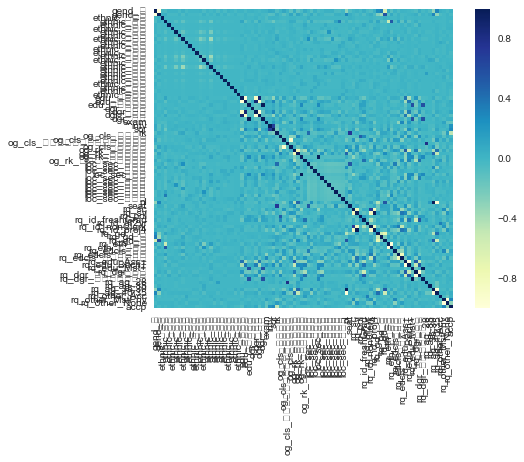

In [266]:
sns.heatmap(df_clean.corr(), square=True, cmap='YlGnBu')

In [267]:
print(df_clean.describe().loc['mean',:])

gend_女                     0.539171
gend_男                     0.460829
ethnic_仡佬族                 0.000461
ethnic_佤族                  0.054839
ethnic_侗族                  0.000461
ethnic_傈僳族                 0.001843
ethnic_傣族                  0.088940
ethnic_其他                  0.002765
ethnic_哈尼族                 0.196774
ethnic_回族                  0.008295
ethnic_壮族                  0.001382
ethnic_布依族                 0.001382
ethnic_布朗族                 0.006912
ethnic_彝族                  0.199078
ethnic_拉祜族                 0.072350
ethnic_水族                  0.000461
ethnic_汉族                  0.336406
ethnic_满族                  0.000461
ethnic_瑶族                  0.009217
ethnic_畲族                  0.000461
ethnic_白族                  0.013825
ethnic_纳西族                 0.001382
ethnic_苗族                  0.001382
ethnic_藏族                  0.000461
ethnic_阿昌族                 0.000461
edu_大学专科                   0.323041
edu_大学本科                   0.669124
edu_硕士研究生                  0

In [268]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 87 columns):
gend_女                   2170 non-null uint8
gend_男                   2170 non-null uint8
ethnic_仡佬族               2170 non-null uint8
ethnic_佤族                2170 non-null uint8
ethnic_侗族                2170 non-null uint8
ethnic_傈僳族               2170 non-null uint8
ethnic_傣族                2170 non-null uint8
ethnic_其他                2170 non-null uint8
ethnic_哈尼族               2170 non-null uint8
ethnic_回族                2170 non-null uint8
ethnic_壮族                2170 non-null uint8
ethnic_布依族               2170 non-null uint8
ethnic_布朗族               2170 non-null uint8
ethnic_彝族                2170 non-null uint8
ethnic_拉祜族               2170 non-null uint8
ethnic_水族                2170 non-null uint8
ethnic_汉族                2170 non-null uint8
ethnic_满族                2170 non-null uint8
ethnic_瑶族                2170 non-null uint8
ethnic_畲族                2170 non-null

观察到这么几个问题需要注意：  
* 'exam', 需要scale，转换成和其它var一样，范围0到1
* 'rk'和'seat'怎么办，
    * 转换成categorical var？
    * 转换成number 0到1之间？
* 'yr'不能要，因为最后的target set并没有'yr'里的任何一个level；'yr'只是用来group分数var,用来计算每个分数在当年当中的相对位置。
* 'intv', 'scr'不能要，因为目的是在不知道面试成绩的情况下预测是否能录取；更别说知道总分了，如果一个人知道了总分还来找你模型预测干嘛，和竞争对手的总分比比就知道了。

In [436]:
df_clean.drop(['intv', 'scr'], axis=1, inplace=True)

## 1st model

In df_clean, all features except `exam`, `intv`, `scr`, `rk` and `seat` are on the same scale, from 0 to 1.  
I haven't decide what to with these 4 variables yet(how to normalize them?)  So let's build the very first model without them, see what the predictive power is.  

In [270]:
X = df_clean.drop(['exam', 'rk', 'seat', 'yr', 'accp'], 
                  axis=1)
y = df_clean['accp']

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

logreg = LogisticRegression()
cv_accu = cross_val_score(logreg, X, y, cv=5)

print(cv_accu)
print(np.mean(cv_accu))

[ 0.66206897  0.5483871   0.38940092  0.51382488  0.58660508]
0.540057389915


In [272]:
np.mean(y) # base line accuracy, pred all as 1

0.6631336405529954

This model did fairly poor, but that is within expectation.  
Since I expect `exam`, `seat` and maybe `rk` is essential to predict `accp`.

## 2nd model with MinMaxScaler on 'exam', 'seat', 'rk'

In [273]:
from sklearn.preprocessing import MinMaxScaler

X = df_clean.drop(['yr', 'accp'], 
                  axis=1)
X = MinMaxScaler().fit_transform(X)
y = df_clean['accp']

In [274]:
logreg = LogisticRegression()

cv_accu = cross_val_score(logreg, X, y, cv=5)
print(cv_accu)
print(np.mean(cv_accu))

[ 0.76321839  0.7281106   0.69354839  0.82718894  0.50115473]
0.702644210297


By including `exam` and `seat`, merely do MinMaxScaler on them, and cross-validation, we can see a significant improvement in accuracy.  
But that's not good enough.  

For now I'm scaling `exam` as a whole group. Obviously there's room for improvement.  
* Firstly, it's possible that in some years the exam is easy while some other years hard. So the same score in 2013 may get one accepted, but no so in 2016. We can group `exam` by `yr` then do the scaling by group.
* Secondly and maybe more importantly, since each student is compete against those aiming at the same job, we can narrow down our focus to see in each job group, figuire out a way to evaluate each student's margin advantage.

## 3rd model

### add  'norm_exam'

In [311]:
df_clean.columns

Index(['gend_女', 'gend_男', 'ethnic_仡佬族', 'ethnic_佤族', 'ethnic_侗族',
       'ethnic_傈僳族', 'ethnic_傣族', 'ethnic_其他', 'ethnic_哈尼族', 'ethnic_回族',
       'ethnic_壮族', 'ethnic_布依族', 'ethnic_布朗族', 'ethnic_彝族', 'ethnic_拉祜族',
       'ethnic_水族', 'ethnic_汉族', 'ethnic_满族', 'ethnic_瑶族', 'ethnic_畲族',
       'ethnic_白族', 'ethnic_纳西族', 'ethnic_苗族', 'ethnic_藏族', 'ethnic_阿昌族',
       'edu_大学专科', 'edu_大学本科', 'edu_硕士研究生', 'dgr_双学士', 'dgr_学士', 'dgr_无学位',
       'dgr_硕士', 'exam', 'intv', 'scr', 'rk', 'og_cls_党的机关', 'og_cls_参照管理事业单位',
       'og_cls_参照管理的人民团体和群众团体', 'og_cls_行政机关', 'og_rk_乡镇级单位', 'og_rk_县区级单位',
       'og_rk_州市级单位', 'og_rk_省级直管县区级机关', 'loc_sec_墨江县', 'loc_sec_孟连县',
       'loc_sec_宁洱县', 'loc_sec_市级', 'loc_sec_思茅区', 'loc_sec_景东县',
       'loc_sec_景谷县', 'loc_sec_江城县', 'loc_sec_澜沧县', 'loc_sec_西盟县',
       'loc_sec_镇沅县', 'pl', 'seat', 'rq_sc', 'rq_sv', 'rq_pol',
       'rq_id_freshGrad', 'rq_id_gr2yr', 'rq_id_nonClerk', 'rq_id_proj4',
       'rq_gd_不限', 'rq_gd_女', 'rq_gd_男', 'rq_eth_不限', 'rq_eth_少

In [312]:
def scl(X):
    return (X - np.min(X)) / (np.max(X) - np.min(X))

In [313]:
temp = df_clean.groupby('yr')['exam'].transform(scl)

In [314]:
pd.DataFrame({'1 min': temp.groupby(df_clean['yr']).min(), 
              '3 max': temp.groupby(df_clean['yr']).max(), 
              '4 avg': temp.groupby(df_clean['yr']).mean(), 
              '2 median':temp.groupby(df_clean['yr']).median()})

,1 min,2 median,3 max,4 avg
yr,,,,
2013,0.0,0.548571,1.0,0.533759
2014,0.0,0.457547,1.0,0.451780
2015,0.0,0.505882,1.0,0.497044
2016,0.0,0.542983,1.0,0.548097


In [437]:
df_clean['norm_exam'] = df_clean.groupby('yr')['exam'].transform(scl)

In [316]:
# a quick model to see if there's improvment
X = df_clean.drop(['exam', 'yr', 'accp'], 
                  axis=1)
y = df_clean['accp']

logreg = LogisticRegression()

cv_accu = cross_val_score(logreg, X, y, cv=5)
print(cv_accu)
print(np.mean(cv_accu))

[ 0.97701149  0.98156682  0.97235023  0.96543779  0.97690531]
0.974654328948


By simply normalize `exam` by `yr`, the improvment is ASTONISHING!!!

In [317]:
df_clean.groupby('yr')['exam'].describe()

,count,mean,std,min,25%,50%,75%,max
yr,,,,,,,,
2013,483.0,146.703934,15.229207,100.0,137.5000,148.00,157.0000,187.50
2014,876.0,147.888699,17.391571,100.0,137.0000,148.50,158.6250,206.00
2015,581.0,153.248709,12.774862,111.0,146.0000,154.00,161.0000,196.00
2016,230.0,53.878783,6.412045,31.5,49.5425,53.67,58.1275,72.33


The `exam` of 2016 is on different scale compared to other years. No wonder such improvement.  



Though I think the accuracy rate is good enough for further optimizatioin, the idea of measure each student's margin advantage is not implemented.   
It's quite interesting so let's try and see if it can get even better score.

### measure margin advantage within candidates of the same job

In [318]:
df.columns

Index(['tkt', 'name', 'gend', 'ethnic', 'school', 'edu', 'dgr', 'exam', 'intv',
       'scr', 'rk', 'og', 'og_cls', 'og_rk', 'loc_prm', 'loc_sec', 'jc', 'jn',
       'pl', 'seat', 'rq_id', 'rq_gd', 'rq_eth', 'rq_edcls', 'rq_edu',
       'rq_dgr', 'rq_ag', 'rq_sc', 'rq_sv', 'rq_pol', 'rq_other', 'stmt',
       'accp', 'yr', 'jc_yr', 'exam_rk'],
      dtype='object')

In [319]:
df.groupby('jc')['yr'].nunique().value_counts()

1    569
2    140
3     98
Name: yr, dtype: int64

从上面可以看出，有569个job code只在一年出现；  
然而有140个jc在两年出现；  
有98个jc在三年中都出现。

我们需要每一年中的每个岗位都是独特的，所以需要一个新的方法来uniquely identify each job.

In [320]:
df['jc_yr'] = df.jc + '_' + df.yr
df['jc_yr'].nunique()  # 有1143个不同distinct job

1143

#### understanding 'rk' feature in df

In [438]:
df['exam_rk'] = df.groupby('jc_yr')['exam'].rank(ascending=False)

In [322]:
sum(df.rk != df.exam_rk)  # 看来df原生的‘rk'并不是指笔试排名

551

In [323]:
df.loc[df.rk != df.exam_rk, ['jc_yr', 'rk', 'exam_rk','seat', 'accp']]

,jc_yr,rk,exam_rk,seat,accp
32,0802004020_2013,2,1.0,1,1
65,0821001025_2013,2,1.0,2,1
66,0821001025_2013,1,2.0,2,1
115,0822001028_2013,1,1.5,3,1
116,0822001028_2013,2,1.5,3,1
140,0823001007_2013,6,5.0,7,1
141,0823001007_2013,7,6.0,7,1
142,0823001007_2013,5,7.0,7,1
144,0823001008_2013,3,2.0,3,1
145,0823001008_2013,2,3.0,3,1


In [324]:
df[['rk', 'exam_rk','seat', 'accp']].corr()

,exam_rk,seat,accp
exam_rk,1.000000,0.738125,-0.402234
seat,0.738125,1.000000,-0.062830
accp,-0.402234,-0.062830,1.000000


In [325]:
from scipy.stats import pearsonr

r, pval = pearsonr(df.seat - df.exam_rk, df.accp)
print((r, pval))

(0.52081270193329887, 3.5849066553466571e-151)


From above we can tell that: 
* The original feature 'rk' in df is not a measurement of exam rank. We should exclude it and add in `exam_rk` that I coined into df_clean.
* (df.seat - df.exam_rk) is a useful measurement of each student's margin advantage against other competetors targeting at the same job. We should add this Series to df_clean.

### drop 'rk', add'exam_rk', 'margin_adv'

In [326]:
df_clean.drop('rk', axis=1, inplace=True)

In [439]:
df_clean['exam_rk'] = df['exam_rk']

In [440]:
df_clean['margin_adv'] = df.seat - df.exam_rk

In [329]:
# a quick model to see if there's improvment
X = df_clean.drop(['exam', 'seat', 'yr', 'accp'], 
                  axis=1)

y = df_clean['accp']

logreg = LogisticRegression()

cv_accu = cross_val_score(logreg, X, y, cv=5)
print(cv_accu)
print(np.mean(cv_accu))

[ 0.85747126  0.84331797  0.80414747  0.80414747  0.89145497]
0.84010782659


After adding `norm_exam`, `exam_rk` and `margin_adv` features, and exclude the original `exam`, `rk`, feature, the accuracy falls.  
Compare to the model with astonishing high accuracy in section [3.3.1  normalize 'exam' by 'yr' in df_clean], I think the fall of accuracy is the result of dropping `rk`.  


The model below is equivalent to the model in  [3.3.1 normalize 'exam' by 'yr' in df_clean], except for it drops 'rk' in X as I now know 'rk' is not available at the time of predition.

In [330]:
X = df_clean.drop(['exam', 'yr', 'accp', 'norm_exam', 'exam_rk', 'margin_adv'], 
                  axis=1)
y = df_clean['accp']

logreg = LogisticRegression()

cv_accu = cross_val_score(logreg, X, y, cv=5)
print(cv_accu)
print(np.mean(cv_accu))

[ 0.68735632  0.65898618  0.53456221  0.6359447   0.75750577]
0.654871036614


It's a relief to see this model does far worse than the model without `rk` but with 3 more feature I added(`norm_exam`, `exam_rk`, `margin_adv`). This verifies the 3 features are of great use.



## 4th model

In [331]:
df.jc_yr.value_counts().head(10)

0828001012_2015    16
0822001004_2014    16
0822001007_2014    14
0822001008_2014    14
0822001003_2014    14
0822001003_2015    13
0822001011_2014    12
0822001001_2015    12
0828001014_2014    12
0822001002_2015    12
Name: jc_yr, dtype: int64

In [441]:
df_clean['jc_yr'] = df['jc_yr']

In [333]:
df_clean.loc[ df_clean['jc_yr']=='0828001012_2015', 
             ['norm_exam', 'exam_rk', 'margin_adv', 'seat','accp']]

,norm_exam,exam_rk,margin_adv,seat,accp
1439,0.570588,1.0,7.0,8,1
1485,0.476471,2.0,6.0,8,1
1576,0.464706,3.0,5.0,8,1
1595,0.411765,4.0,4.0,8,1
1640,0.382353,6.0,2.0,8,1
1717,0.352941,8.0,0.0,8,1
1734,0.358824,7.0,1.0,8,1
1770,0.400000,5.0,3.0,8,1
1842,0.300000,9.0,-1.0,8,0
1854,0.264706,10.0,-2.0,8,0


In [334]:
df.jc_yr.nunique()

1143

In [335]:
sum(df_clean.exam_rk == df_clean.seat)

1117

In [442]:
df_clean['exam_rk_tie'] = df_clean.groupby('jc_yr')['norm_exam'].rank(ascending=False, method='first')

In [337]:
df_clean.head()

,gend_女,gend_男,ethnic_仡佬族,ethnic_佤族,ethnic_侗族,ethnic_傈僳族,ethnic_傣族,ethnic_其他,ethnic_哈尼族,ethnic_回族,...,rq_other_Acc,rq_other_MstPriv,rq_other_None,accp,yr,norm_exam,exam_rk,margin_adv,jc_yr,exam_rk_tie
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,2013,0.400000,1.0,0.0,0800001001_2013,1.0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,2013,0.817143,1.0,0.0,0800003001_2013,1.0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,2013,0.851429,1.0,0.0,0800003002_2013,1.0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,2013,1.000000,1.0,1.0,0800004001_2013,1.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,2013,0.697143,2.0,0.0,0800004001_2013,2.0


In [338]:
sum(df_clean.exam_rk_tie == df_clean.seat)

1139

In [340]:
df_clean.loc[
    ~df_clean.jc_yr.isin(
        df_clean.loc[df_clean.exam_rk_tie == df_clean.seat, 'jc_yr']
    ), 
    ['jc_yr','norm_exam', 'exam_rk', 'exam_rk_tie','margin_adv', 'seat','accp']
] 

,jc_yr,norm_exam,exam_rk,exam_rk_tie,margin_adv,seat,accp
506,0822001010_2014,0.490566,1.0,1.0,1.0,2,1
548,0822003002_2014,0.391509,1.0,1.0,1.0,2,1
653,0821001033_2014,0.344340,1.0,1.0,2.0,3,0
654,0821001033_2014,0.273585,2.0,2.0,1.0,3,1
1178,0828996001_2014,0.457547,1.0,1.0,1.0,2,1


In [342]:
exam_ref = df_clean.loc[df_clean.exam_rk_tie==df_clean.seat, ['jc_yr','norm_exam']].copy()

In [343]:
exam_ref.columns = ['jc_yr', 'exam_ref']
exam_ref.head()

,jc_yr,exam_ref
0,0800001001_2013,0.400000
1,0800003001_2013,0.817143
2,0800003002_2013,0.851429
4,0800004001_2013,0.697143
6,0800005001_2013,0.685714


In [444]:
df_clean = pd.merge(df_clean, exam_ref, on='jc_yr')
df_clean.head()

,gend_女,gend_男,ethnic_仡佬族,ethnic_佤族,ethnic_侗族,ethnic_傈僳族,ethnic_傣族,ethnic_其他,ethnic_哈尼族,ethnic_回族,...,rq_other_MstPriv,rq_other_None,accp,yr,norm_exam,exam_rk,margin_adv,jc_yr,exam_rk_tie,exam_ref
0,0,1,0,0,0,0,0,0,0,0,...,0,1,1,2013,0.400000,1.0,0.0,0800001001_2013,1.0,0.400000
1,0,1,0,0,0,0,0,0,1,0,...,0,1,1,2013,0.817143,1.0,0.0,0800003001_2013,1.0,0.817143
2,0,1,0,0,0,0,0,0,0,0,...,0,1,1,2013,0.851429,1.0,0.0,0800003002_2013,1.0,0.851429
3,0,1,0,0,0,0,0,0,0,0,...,0,1,1,2013,1.000000,1.0,1.0,0800004001_2013,1.0,0.697143
4,1,0,0,0,0,0,0,0,0,0,...,0,1,1,2013,0.697143,2.0,0.0,0800004001_2013,2.0,0.697143


In [445]:
df_clean['exam_adv'] = df_clean.norm_exam - df_clean.exam_ref
df_clean.info() # 5 rows were dropped when merge, 
                # for they don't have exam_ref

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2165 entries, 0 to 2164
Data columns (total 92 columns):
gend_女                   2165 non-null uint8
gend_男                   2165 non-null uint8
ethnic_仡佬族               2165 non-null uint8
ethnic_佤族                2165 non-null uint8
ethnic_侗族                2165 non-null uint8
ethnic_傈僳族               2165 non-null uint8
ethnic_傣族                2165 non-null uint8
ethnic_其他                2165 non-null uint8
ethnic_哈尼族               2165 non-null uint8
ethnic_回族                2165 non-null uint8
ethnic_壮族                2165 non-null uint8
ethnic_布依族               2165 non-null uint8
ethnic_布朗族               2165 non-null uint8
ethnic_彝族                2165 non-null uint8
ethnic_拉祜族               2165 non-null uint8
ethnic_水族                2165 non-null uint8
ethnic_汉族                2165 non-null uint8
ethnic_满族                2165 non-null uint8
ethnic_瑶族                2165 non-null uint8
ethnic_畲族                2165 non-null

In [446]:
df_clean['seat_scl'] = scl(df_clean.seat) # scaled seats

In [366]:
# a quick model to see if there's improvment
X = df_clean.drop(['exam', 'yr', 'accp', 'jc_yr', 'exam_rk_tie'], 
                  axis=1)
y = df_clean['accp']

logreg = LogisticRegression()

cv_accu = cross_val_score(logreg, X, y, cv=5)
print(cv_accu)
print(np.mean(cv_accu))

[ 0.86836028  0.83833718  0.81293303  0.80138568  0.8891455 ]
0.842032332564


By adding `exam_adv` and `seat_scl`, we have a minor improvement in accuracy by about 0.02.

## tuning 4th model

The 4th model is our final model for playing with data from year 2013 to 2016.

In [389]:
# no test set
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 
              'penalty':['l1', 'l2']}

logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X, y)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'penalty': 'l1', 'C': 0.051794746792312128}
0.884988452656


{'penalty': 'l1', 'C': 0.051794746792312128}
0.889915319477


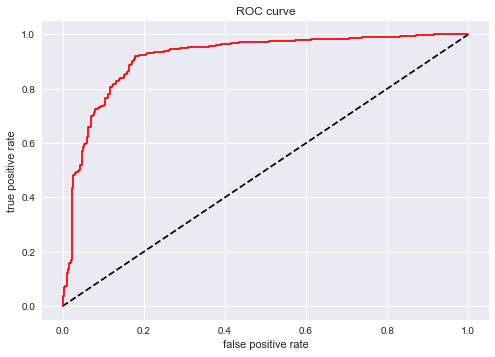

In [390]:
# with test set
from sklearn.model_selection import train_test_split, GridSearchCV

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 
              'penalty':['l1', 'l2']}

logreg = LogisticRegression()

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state=42)
logreg_cv.fit(X_train, y_train)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

y_pred_prob = logreg_cv.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, c='red')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')

In [392]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

print('AUC: {}'.format(roc_auc_score(y_test, y_pred_prob)))

cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print('5-fold AUC: {}'.format(cv_auc))

AUC: 0.9152568449580752
5-fold AUC: [ 0.9825068   0.92107775  0.81805164  0.8564269   0.89451577]


## 5th model: to predict on 2017 data

In [451]:
X = df_clean[['norm_exam','exam_rk',
              'seat',
                'margin_adv','exam_ref','exam_adv',
              ]]
    # pick the params I thinks are most important

y = df_clean['accp']

logreg = LogisticRegression()

cv_accu = cross_val_score(logreg, X, y, cv=10)
print(cv_accu)
print(np.mean(cv_accu))

[ 0.94009217  0.95852535  0.94930876  0.9078341   0.86175115  0.80555556
  0.77777778  0.84722222  0.90740741  0.89814815]
0.885362263185


{'penalty': 'l1', 'C': 0.051794746792312128}
0.889915319477


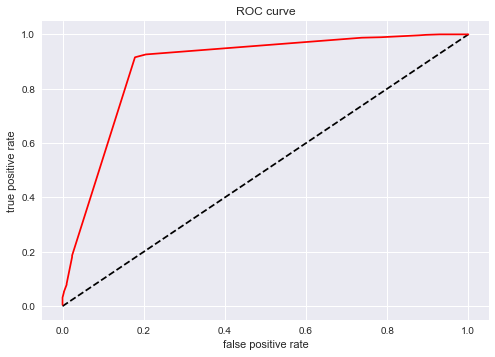

In [497]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 
              'penalty':['l1', 'l2']}

logreg = LogisticRegression()

X = df_clean[['norm_exam','exam_rk',
              'seat',
                'margin_adv','exam_ref','exam_adv',
              ]]
    # pick the params I thinks are most important
y = df_clean['accp']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.4, 
                                                    random_state=42)

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)

print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

In [498]:
X

,norm_exam,exam_rk,seat,margin_adv,exam_ref,exam_adv
0,0.400000,1.0,1,0.0,0.400000,0.000000
1,0.817143,1.0,1,0.0,0.817143,0.000000
2,0.851429,1.0,1,0.0,0.851429,0.000000
3,1.000000,1.0,2,1.0,0.697143,0.302857
4,0.697143,2.0,2,0.0,0.697143,0.000000
5,0.937143,1.0,2,1.0,0.685714,0.251429
6,0.685714,2.0,2,0.0,0.685714,0.000000
7,0.708571,1.0,1,0.0,0.708571,0.000000
8,0.622857,1.0,1,0.0,0.622857,0.000000
9,0.754286,1.0,1,0.0,0.754286,0.000000


In [554]:
puer17_clean = puer17[['准考证号','笔试总成绩', '笔试总成绩岗位排名',
            '岗位代码',  '招录人数','所报岗位招录计划裁减后招录人数',
            ] ]
puer17_clean.columns = ['tkt', 'exam', 'exam_rk',
                  'jc', 'seat1', 'seat2',
                  ]
puer17_clean.head()
print(puer17_clean.shape)

(334, 6)


In [555]:
puer17_clean.loc[:, 'norm_exam'] = scl(puer17_clean.loc[:,'exam'])

/Users/EzraYang/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/EzraYang/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [556]:
puer17_clean.jc.nunique()

153

In [557]:
sum(puer17_clean.seat1 == puer17_clean.seat2)

334

In [558]:
puer17_clean.drop('seat2', axis=1, inplace=True)

/Users/EzraYang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [559]:
puer17_clean['margin_adv'] = puer17_clean.seat1 - puer17_clean.exam_rk

/Users/EzraYang/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [560]:
puer17_clean.shape

(334, 7)

In [561]:
exam_ref = puer17_clean.loc[puer17_clean.exam_rk==puer17_clean.seat1, ['jc','norm_exam']].copy()
exam_ref.head()

,jc,norm_exam
0,40822005001,0.966346
3,10823006002,0.288462
4,10828018001,0.173077
7,10825007001,0.274038
9,10823006001,0.355769


In [563]:
exam_ref.columns=['jc', 'exam_ref']

In [564]:
puer17_clean = pd.merge(puer17_clean, exam_ref, on='jc', how='inner')
puer17_clean.head()
print(puer17_clean.shape)

(332, 8)


In [565]:
puer17_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 331
Data columns (total 8 columns):
tkt           332 non-null object
exam          332 non-null float64
exam_rk       332 non-null float64
jc            332 non-null object
seat1         332 non-null int64
norm_exam     332 non-null float64
margin_adv    332 non-null float64
exam_ref      332 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 23.3+ KB


In [566]:
puer17_clean.head()

,tkt,exam,exam_rk,jc,seat1,norm_exam,margin_adv,exam_ref
0,201360203624,231.0,1.0,40822005001,1,0.966346,0.0,0.966346
1,201270601214,219.0,3.0,40822005001,1,0.850962,-2.0,0.966346
2,101360711102,158.0,2.0,10823006002,1,0.264423,-1.0,0.288462
3,101270100126,160.5,1.0,10823006002,1,0.288462,0.0,0.288462
4,101270505314,148.5,1.0,10828018001,1,0.173077,0.0,0.173077


In [567]:
puer17_clean['exam_adv'] = puer17_clean.norm_exam - puer17_clean.exam_ref

In [572]:
puer17_clean.columns =['tkt', 'exam', 'exam_rk', 'jc', 'seat', 'norm_exam', 'margin_adv',
       'exam_ref', 'exam_adv']

In [573]:
X_17 = puer17_clean[['norm_exam','exam_rk',
                  'seat',
                'margin_adv','exam_ref','exam_adv',
              ]]

logreg = LogisticRegression(penalty='l1', C=0.051794746792312128)

logreg.fit(X_train, y_train)

y_17_pred = logreg.predict(X_17)
y_17_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1,

In [574]:
puer17_clean['pred_accp'] = y_17_pred
puer17_clean.head()

,tkt,exam,exam_rk,jc,seat,norm_exam,margin_adv,exam_ref,exam_adv,pred_accp
0,201360203624,231.0,1.0,40822005001,1,0.966346,0.0,0.966346,0.000000,1
1,201270601214,219.0,3.0,40822005001,1,0.850962,-2.0,0.966346,-0.115385,0
2,101360711102,158.0,2.0,10823006002,1,0.264423,-1.0,0.288462,-0.024038,0
3,101270100126,160.5,1.0,10823006002,1,0.288462,0.0,0.288462,0.000000,1
4,101270505314,148.5,1.0,10828018001,1,0.173077,0.0,0.173077,0.000000,1


In [579]:
print(len(y_17_pred))    # 共有332人的预测录取数据
print(np.mean(y_17_pred))# 录取率为0.515060240964
print(np.sum(y_17_pred)) # 预测录取其中171人

332
0.515060240964
171


In [585]:
np.sum(puer17_clean[['jc', 'seat']].drop_duplicates()['seat']) # 这些人当中最多会录取162人
        # 拭目以待

162

# end